# Temperature Forecast Project using ML

# Project Description


This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.


In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [2]:
#reading the csv files and listing the datas
df_temp = pd.read_csv(r"C:\Users\Premium\Downloads\temperature.csv")
df_temp.head(5)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


Please note that there are two target variables here:
    
    1) Next_Tmax: Next day maximum temperature
        
    2)Next_Tmin: Next day minimum temperature

# Exploratory Data Analysis

In [3]:
df_temp.shape

(7752, 25)

In [4]:
print('No of Rows:',df_temp.shape[0])
print('No of Columns:',df_temp.shape[1])

No of Rows: 7752
No of Columns: 25


In [5]:
df_temp.columns  # This will print the names of all columns.

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [6]:
df_temp.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

All variable are Numerical in nature.

From info we have seen that Date is Object type not the date type. We have to change its type to date type since we will be using this for our machine learning models.

In [7]:
# Converting Date datatypes and spliting date into date, month and year.
df_temp['Date']=pd.to_datetime(df_temp['Date'])
df_temp['Day']=df_temp['Date'].apply(lambda x:x.day)
df_temp['Month']=df_temp['Date'].apply(lambda x:x.month)
df_temp['Year']=df_temp['Date'].apply(lambda x:x.year)
df_temp.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30.0,6.0,2013.0
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30.0,6.0,2013.0
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30.0,6.0,2013.0
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,30.0,6.0,2013.0
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,30.0,6.0,2013.0


In [8]:
df_temp.dtypes

station                    float64
Date                datetime64[ns]
Present_Tmax               float64
Present_Tmin               float64
LDAPS_RHmin                float64
LDAPS_RHmax                float64
LDAPS_Tmax_lapse           float64
LDAPS_Tmin_lapse           float64
LDAPS_WS                   float64
LDAPS_LH                   float64
LDAPS_CC1                  float64
LDAPS_CC2                  float64
LDAPS_CC3                  float64
LDAPS_CC4                  float64
LDAPS_PPT1                 float64
LDAPS_PPT2                 float64
LDAPS_PPT3                 float64
LDAPS_PPT4                 float64
lat                        float64
lon                        float64
DEM                        float64
Slope                      float64
Solar radiation            float64
Next_Tmax                  float64
Next_Tmin                  float64
Day                        float64
Month                      float64
Year                       float64
dtype: object

# Checking for Missing Values

In [9]:
df_temp.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
Day                  2
Month                2
Year                 2
dtype: int64

In [10]:
df_temp.isnull().sum().sum()

1254

There are 1254 null values.

In [11]:
#Finding what percentage of data is missing from the dataset

missing_values = df_temp.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df_temp))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                  Missing Values  % Missing data
LDAPS_PPT1                    75        0.967492
LDAPS_LH                      75        0.967492
LDAPS_PPT4                    75        0.967492
LDAPS_PPT3                    75        0.967492
LDAPS_PPT2                    75        0.967492
LDAPS_CC4                     75        0.967492
LDAPS_CC3                     75        0.967492
LDAPS_CC2                     75        0.967492
LDAPS_CC1                     75        0.967492
LDAPS_WS                      75        0.967492
LDAPS_Tmin_lapse              75        0.967492
LDAPS_Tmax_lapse              75        0.967492
LDAPS_RHmax                   75        0.967492
LDAPS_RHmin                   75        0.967492
Present_Tmin                  70        0.902993
Present_Tmax                  70        0.902993
Next_Tmax                     27        0.348297
Next_Tmin                     27        0.348297
Month                          2        0.025800
Day                 

Here the missing values present are less than 1%. So We can directly drop these missing values.

In [12]:
df_temp.dropna(inplace=True)

print("We have {} Rows and {} Columns after dropping null values.".format(df_temp.shape[0], df_temp.shape[1]))

We have 7588 Rows and 28 Columns after dropping null values.


In [14]:
df_temp.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
Day                 0
Month               0
Year                0
dtype: int64

Finally there are NO missing values.

In [16]:
df_temp.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
count,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,...,7588.000000,7588.00000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,13.014101,29.748366,23.195809,56.724969,88.360823,29.620128,23.511786,7.094097,62.492606,0.368510,...,37.544792,126.99142,61.918136,1.259755,5343.724208,30.241526,22.910820,16.337375,7.068134,2014.991697
std,7.217858,2.967401,2.400880,14.626559,7.199456,2.943496,2.342579,2.177034,33.686158,0.262260,...,0.050428,0.07922,54.323529,1.372748,429.782561,3.111807,2.482256,8.216880,2.242389,1.410877
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,37.456200,126.82600,12.370000,0.098500,4329.520508,17.400000,11.300000,7.000000,1.000000,2013.000000
25%,7.000000,27.800000,21.600000,45.960243,84.203724,27.673756,22.086820,5.675358,37.206201,0.146546,...,37.510200,126.93700,28.700000,0.271300,5001.485717,28.200000,21.300000,8.000000,7.000000,2014.000000
50%,13.000000,29.900000,23.400000,55.023199,89.784122,29.709537,23.758249,6.547838,56.898324,0.315706,...,37.550700,126.99500,45.716000,0.618000,5441.987305,30.400000,23.100000,16.000000,7.000000,2015.000000
75%,19.000000,32.000000,24.800000,67.115099,93.742725,31.711109,25.155660,8.028960,84.235666,0.574174,...,37.577600,127.04200,59.832400,1.767800,5729.485840,32.600000,24.600000,24.000000,8.000000,2016.000000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,37.645000,127.13500,212.335000,5.178200,5992.895996,38.900000,29.800000,31.000000,12.000000,2017.000000


# Exploring Present Temperature

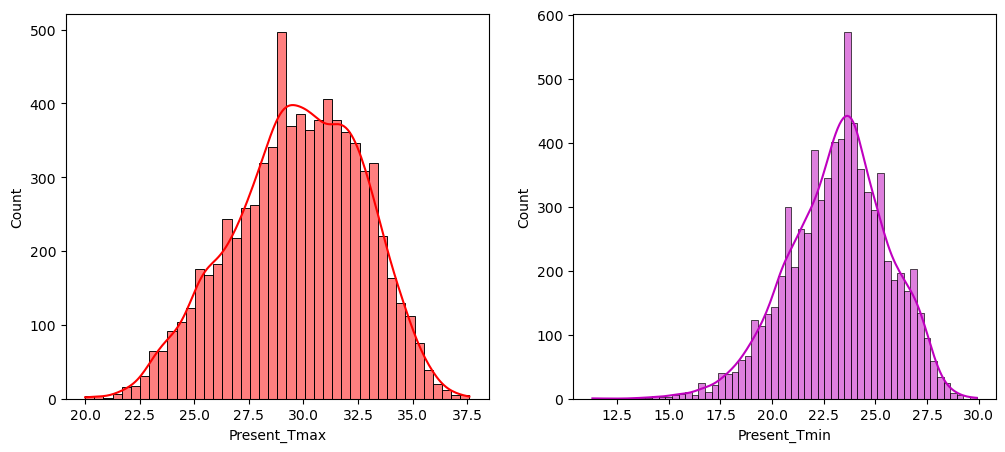

In [17]:
# Plotting histogram for present_Tmax and present_Tmin variables

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df_temp['Present_Tmax'],kde=True,color='r')
plt.subplot(1,2,2)
sns.histplot(df_temp['Present_Tmin'],kde=True,color='m')
plt.show()

Majority of reading for  Present Temperature Maximum varies in between 27.5 to 33 degree.

Majority of reading for  Present Temperature Minimum varies in between 21 to 27.5 degree.

In [19]:
#df_temp.hist(bins=10,figsize=(15,15))


# Maximum and Minimum Temperature over period

In [23]:
print('Present Maximum Temperature Maxima in year 2013-2017 :',df_temp.Present_Tmax.max())

Present Maximum Temperature Maxima in year 2013-2017 : 37.6


In [24]:
print('Present Maximum Temperature Minima in year 2013-2017 :',df_temp.Present_Tmax.min())

Present Maximum Temperature Minima in year 2013-2017 : 20.0


In [25]:
print(' Average Present Maximum Temperature in year 2013-2017 :',df_temp.Present_Tmax.mean())

 Average Present Maximum Temperature in year 2013-2017 : 29.748365840801227


In [27]:
print('Present Minimum Temperature Maxima in year 2013-2017 :',df_temp.Present_Tmin.max())
print('Present Minimum Temperature Minima in year 2013-2017 :',df_temp.Present_Tmin.min())
print('Average Present Minimum Temperature in year 2013-2017 :',df_temp.Present_Tmin.mean())

Present Minimum Temperature Maxima in year 2013-2017 : 29.9
Present Minimum Temperature Minima in year 2013-2017 : 11.3
Average Present Minimum Temperature in year 2013-2017 : 23.195809172377487


Locating where these Max and Min temp are present in our dataset

In [28]:
df_temp.loc[df_temp.Present_Tmax==df_temp.Present_Tmax.max()]

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
5717,18.0,2016-11-08,37.6,26.8,44.254253,87.745514,34.794021,27.150764,6.366598,111.225118,...,37.4832,127.024,56.4448,1.2313,5082.563477,37.0,27.8,8.0,11.0,2016.0


In [29]:
df_temp.loc[df_temp.Present_Tmax==df_temp.Present_Tmax.min()]

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
7725,1.0,2017-08-30,20.0,15.1,35.652172,89.97319,24.323737,16.128899,7.087329,108.981108,...,37.6046,126.991,212.335,2.785,4614.76123,23.8,15.1,30.0,8.0,2017.0


In [30]:
df_temp.loc[df_temp.Present_Tmin==df_temp.Present_Tmin.max()]

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
2397,23.0,2014-02-08,35.3,29.9,53.946949,85.985161,30.912804,25.439537,13.011129,117.837212,...,37.5372,126.891,15.5876,0.1554,5360.226563,31.3,24.8,8.0,2.0,2014.0


In [31]:
df_temp.loc[df_temp.Present_Tmin==df_temp.Present_Tmin.min()]

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
6116,17.0,2016-08-27,27.1,11.3,62.793823,91.726936,23.529546,17.963487,7.984566,84.48145,...,37.6181,127.099,53.4712,0.697,4539.616699,24.6,17.1,27.0,8.0,2016.0


Present Maximum Temperature Maxima over five year span recorded at station 18 on 2016-11-08 with Temp of 37.6 degree. 

Present Maximum Temperature Minima over five year span recorded at station 1 on 2017-08-30 with Temp of 20 degree.

Present Maximum Temperature Maxima over five  year span recorded at station 23 on 2014-02-08 with Temp of 29.9 degree.

Present Maximum Temperature Minima over five year span recorded at station 17 on 2016-08-27 with Temp of 11.3 degree. 

# Line Plot of Present Temperature Maximum over each Station

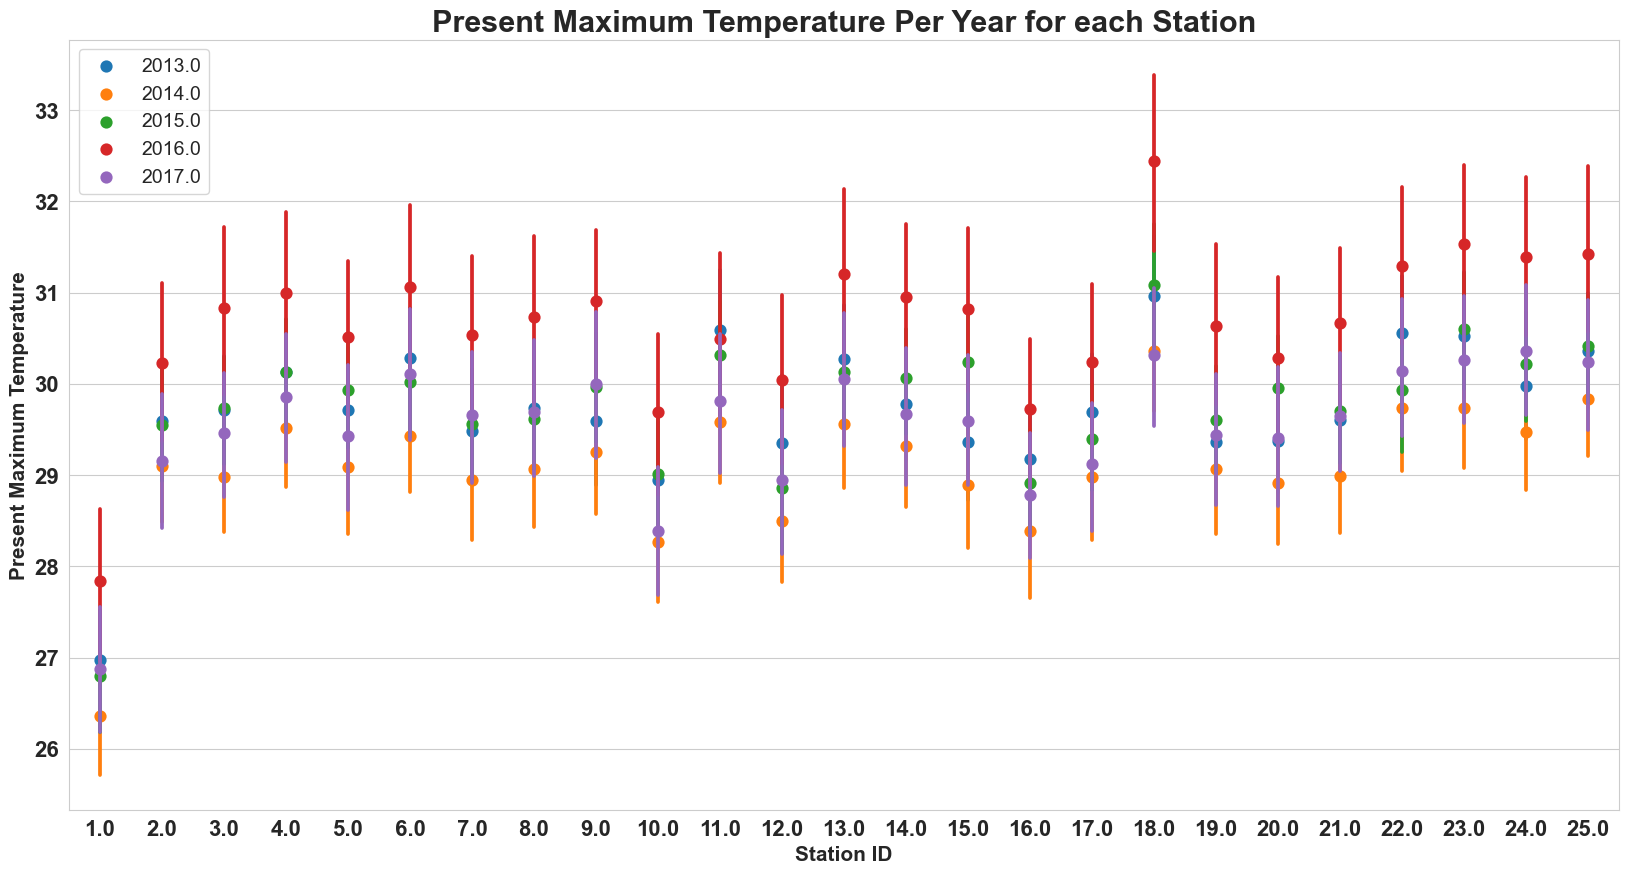

In [32]:
plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
sns.pointplot(x='station', y='Present_Tmax', data=df_temp, hue='Year',join=False)
plt.title('Present Maximum Temperature Per Year for each Station', fontsize=22, fontweight='bold')
plt.xlabel('Station ID',{'fontsize':15,'fontweight' :'bold'})
plt.ylabel('Present Maximum Temperature',{'fontsize':15,'fontweight' :'bold'})
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=14)

Over all four year higher temperature recorded at station 18.

Station 1 is coolest station over all timeframe.

We can see 2016 is hottest year and 2014 is coolest year.

# Line Plot of Present Temperature Minimum over each Station

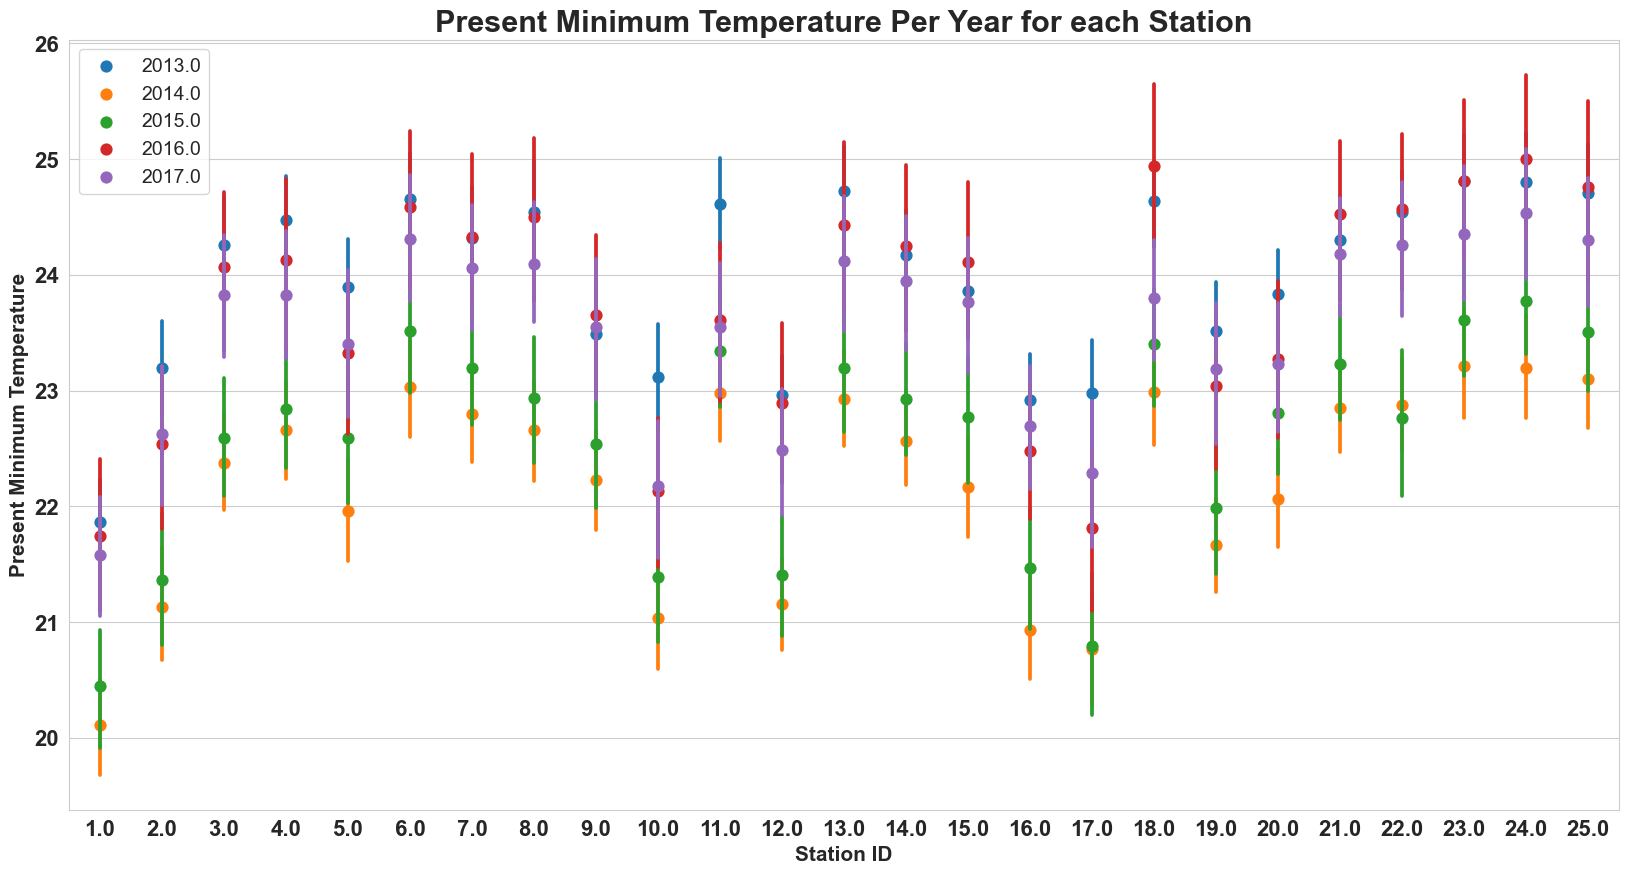

In [34]:
plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
sns.pointplot(x='station', y='Present_Tmin', data=df_temp, hue='Year',join=False)
plt.title('Present Minimum Temperature Per Year for each Station', fontsize=22, fontweight='bold')
plt.xlabel('Station ID',{'fontsize':15,'fontweight' :'bold'})
plt.ylabel('Present Minimum Temperature',{'fontsize':15,'fontweight' :'bold'})
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=14)

Year 2014 is coolest year of all time.

Highest Present Minimum Temperature recorded at Station 24.

Station 1 is coolest station of all time followed by station 17.

####Solar radiation has naturally going to have effect on wind speed,precipitation and humidity.

<AxesSubplot:xlabel='Month', ylabel='Solar radiation'>

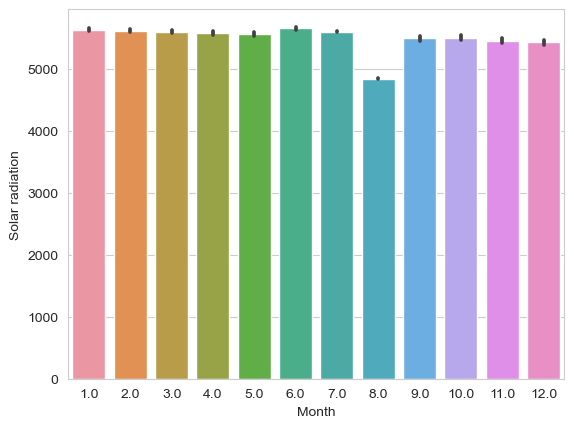

In [35]:
sns.barplot(x=df_temp['Month'], y=df_temp['Solar radiation'])


<AxesSubplot:xlabel='Next_Tmax', ylabel='Solar radiation'>

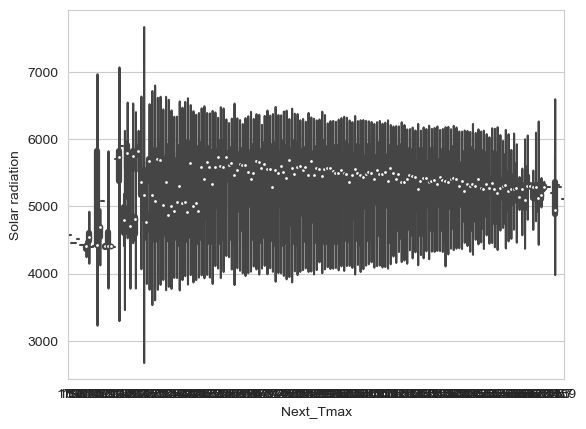

In [36]:
sns.violinplot(x=df_temp['Next_Tmax'], y=df_temp['Solar radiation'])

#  Data Visualizing of Target variables

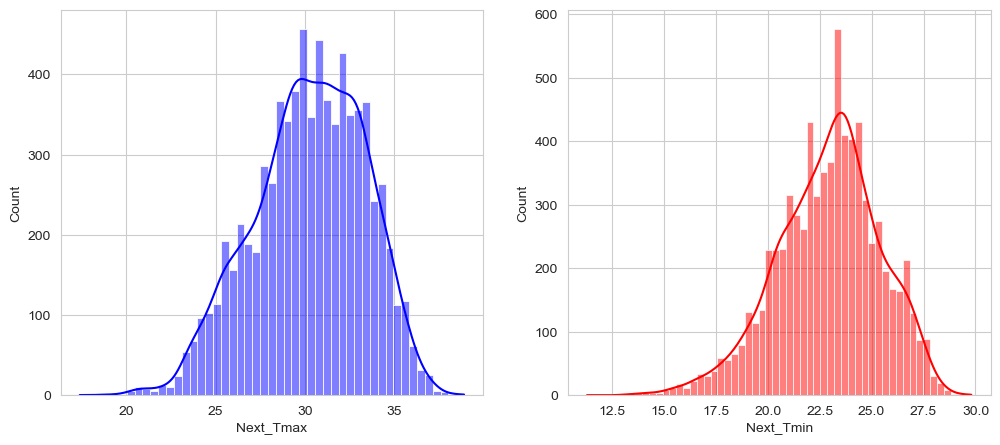

In [37]:
# Plotting histogram for target variables
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df_temp['Next_Tmax'],kde=True,color='b')
plt.subplot(1,2,2)
sns.histplot(df_temp['Next_Tmin'],kde=True,color='r')
plt.show()

We get same result as we get in case of present temperature.

For majority of reading Next Temperature Maximum varies in between 27.5 to 32.5 degree.

For majority of reading Next Temperature Minimum varies in between 22.5 to 26 degree.

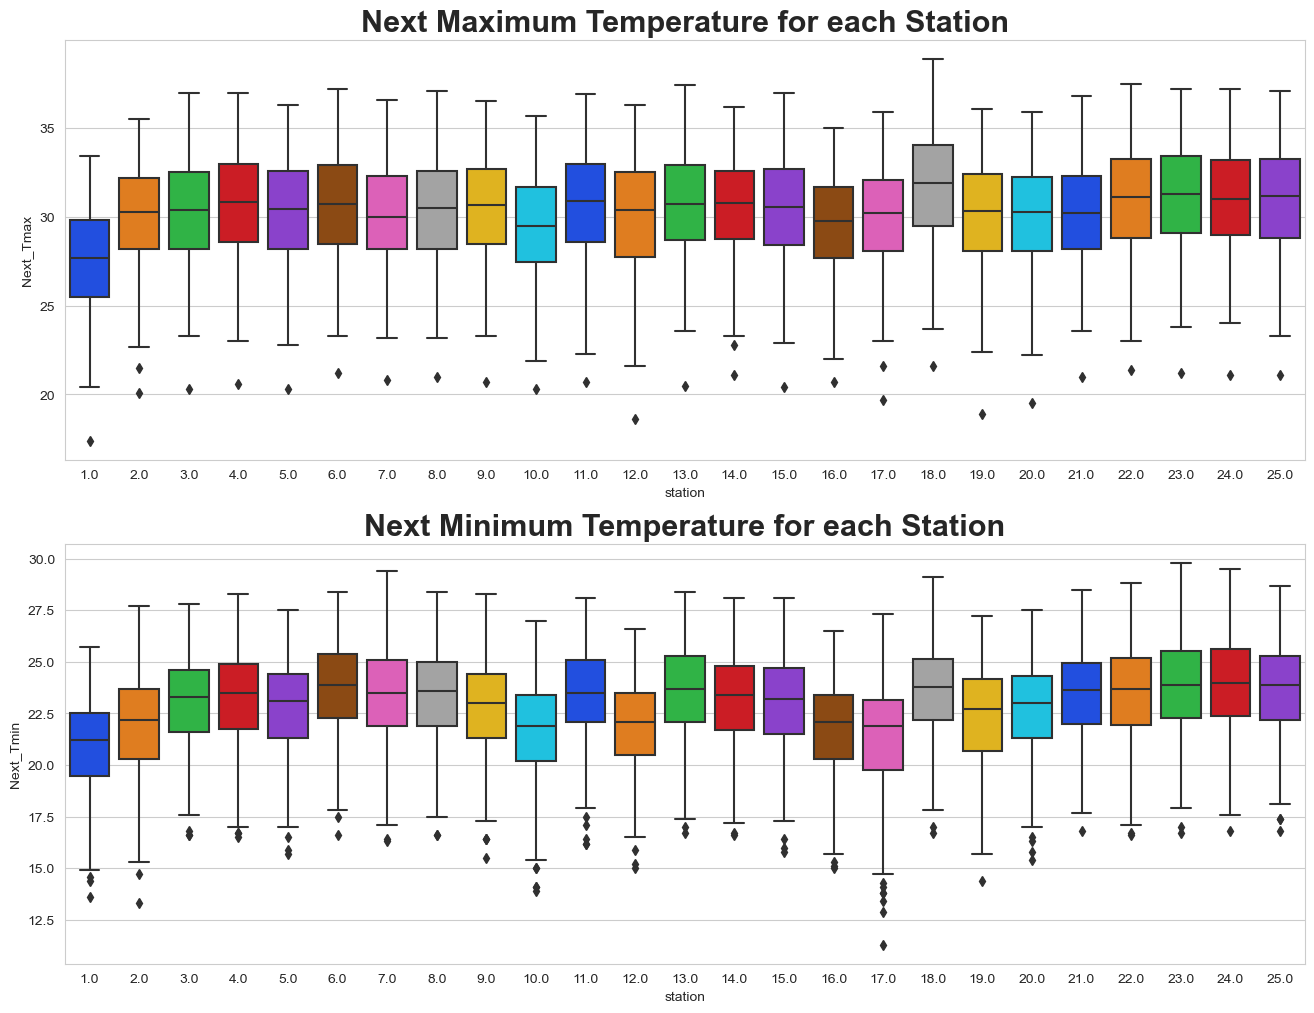

In [38]:
# Visualizing the realtion between station and target variables

plt.figure(figsize=(16,12))
plt.subplot(2,1,1)
sns.boxplot(df_temp['station'],df_temp['Next_Tmax'],data=df_temp,palette="bright")
plt.title('Next Maximum Temperature for each Station', fontsize=22, fontweight='bold')
plt.subplot(2,1,2)
sns.boxplot(df_temp['station'],df_temp['Next_Tmin'],data=df_temp,palette="bright")
plt.title('Next Minimum Temperature for each Station', fontsize=22, fontweight='bold')
plt.show()

we can notice the station 18 has highest temperature collection for both Next_Tmax and Next_Tmin targets.

Maximum temperature difference at same station occur in station 17.

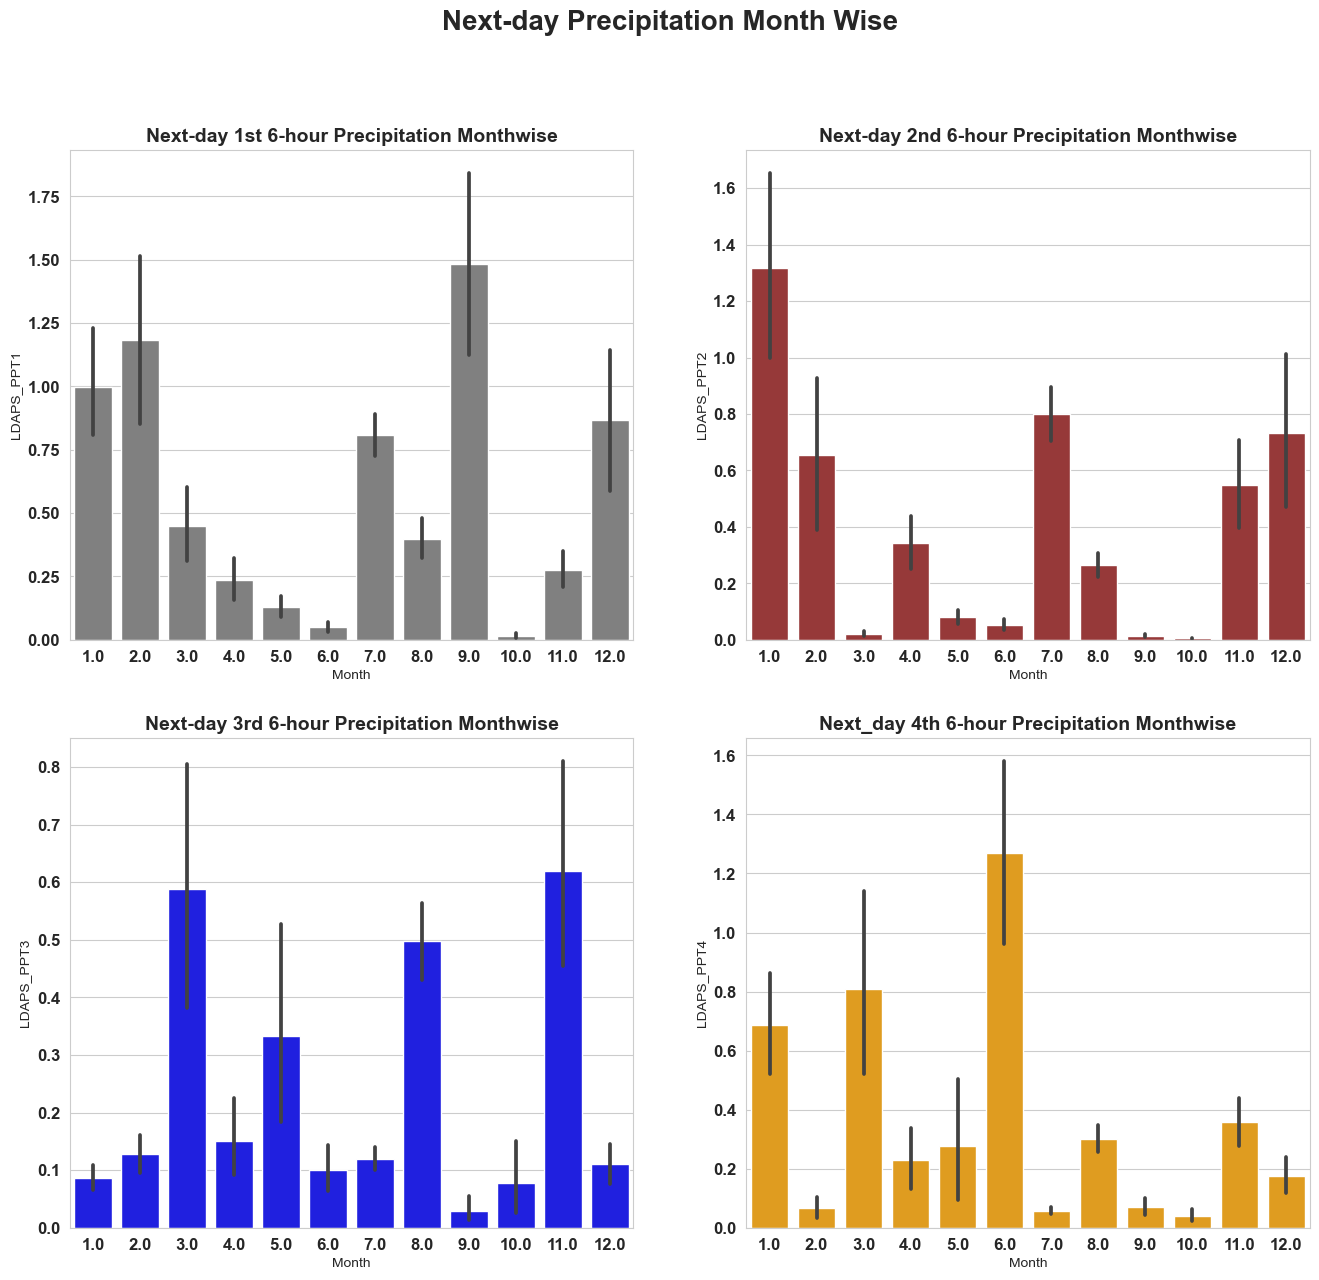

In [40]:
# Comparing Next day precipitation Month Wise 

plt.figure(figsize=(16,14))
plt.suptitle('Next-day Precipitation Month Wise',fontsize=20, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Next-day 1st 6-hour Precipitation Monthwise',fontsize=14, fontweight='bold')
sns.barplot(x=df_temp['Month'], y=df_temp['LDAPS_PPT1'],data=df_temp,color="grey")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Next-day 2nd 6-hour Precipitation Monthwise',fontsize=14, fontweight='bold')
sns.barplot(x=df_temp['Month'], y=df_temp['LDAPS_PPT2'],data=df_temp,color='brown')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Next-day 3rd 6-hour Precipitation Monthwise',fontsize=14, fontweight='bold')
sns.barplot(x=df_temp['Month'], y=df_temp['LDAPS_PPT3'],data=df_temp,color='blue')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Next_day 4th 6-hour Precipitation Monthwise',fontsize=14, fontweight='bold')
sns.barplot(x=df_temp['Month'], y=df_temp['LDAPS_PPT4'],data=df_temp,color="orange")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

In 9th Month highest precipitation observe in 1st quarter of day.

In 1th Month highest precipitation observe in 2ed quarter of day.

In 11th Month highest precipitation observe in 3rd quarter of day.

In 6th Month highest precipitation observe in 4st quarter of day.

# Analysing the Solar Radiation

Minimum Solar radiation : 4329.520508
Maximum Solar radiation : 5992.895996
Average Solar radiation : 5343.72420785672


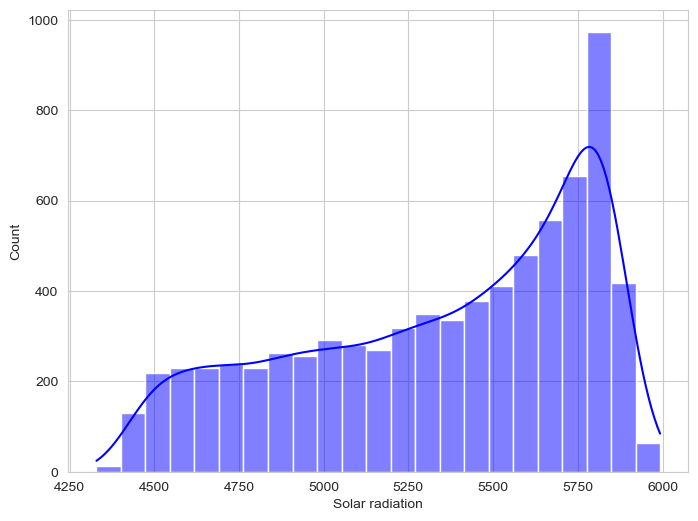

In [43]:
plt.figure(figsize=(8,6))
sns.histplot(df_temp['Solar radiation'],kde=True,color='b')
print('Minimum Solar radiation :',df_temp['Solar radiation'].min())
print('Maximum Solar radiation :',df_temp['Solar radiation'].max())
print('Average Solar radiation :',df_temp['Solar radiation'].mean())

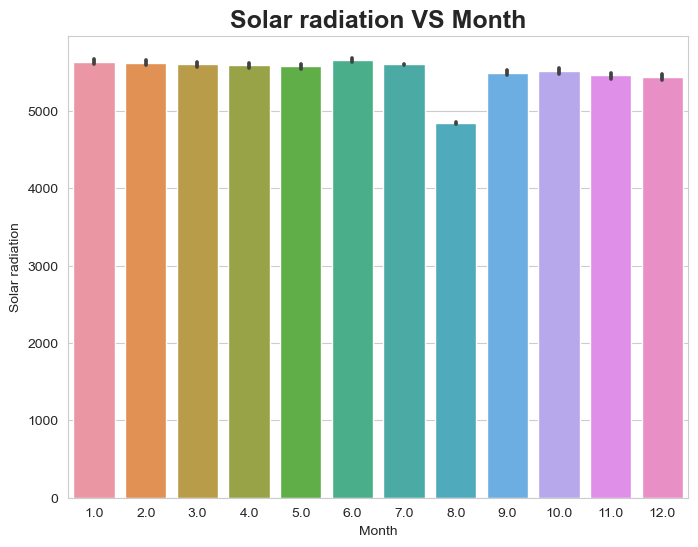

In [45]:
sns.set_palette('husl')
plt.figure(figsize=(8,6))
sns.barplot(y=df_temp['Solar radiation'], x=df_temp['Month'])
plt.title('Solar radiation VS Month',fontsize=18, fontweight='bold')
plt.show()

Solar Radiation data is left skewed.

It has its minimum value at 4329.52 Wh/m2 and maximum values at 5992.89 Wh/m2.

For most of reading solar radiation values lies in the range 5600 to 5850.

Minimum solar radiation occur in month of 8.

In [48]:
# Analysing Wind speed

Minimum Wind Speed : 2.882579625 m/s
Maximum Wind Speed : 21.85762099 m/s
Average Wind Speed : 7.094096699159837 m/s


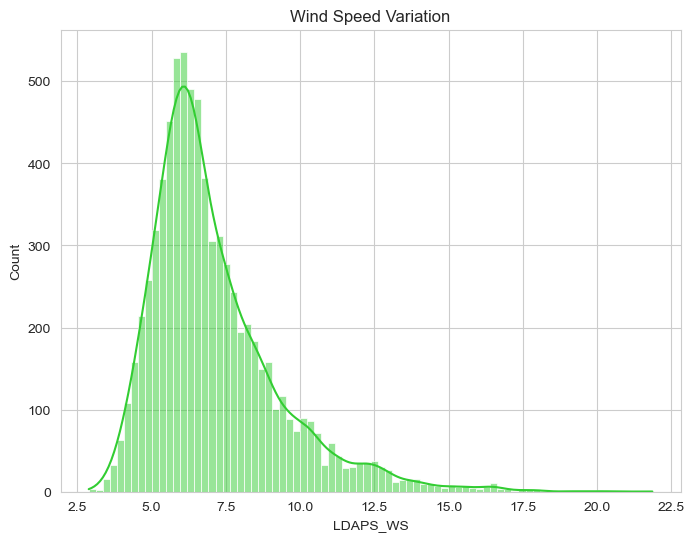

In [49]:
plt.figure(figsize=(8,6))
sns.histplot(df_temp['LDAPS_WS'],kde=True,color='limegreen')
plt.title('Wind Speed Variation')
print('Minimum Wind Speed :',df_temp['LDAPS_WS'].min(),'m/s')
print('Maximum Wind Speed :',df_temp['LDAPS_WS'].max(),'m/s')
print('Average Wind Speed :',df_temp['LDAPS_WS'].mean(),'m/s')

It have its minimum value at 2.88m/s and maximum values at 21.85m/s

For most of reading values lies in the rabge 5m/s to 8m/s

# Data Correlation

In [50]:
df_temp.corr()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
station,1.000000,0.113301,0.133282,-0.067846,-0.169351,0.069856,0.105277,0.005822,-0.132129,0.006539,...,-0.239118,-0.118845,-0.256706,-0.091721,-0.021194,0.107747,0.128184,-0.000996,0.001211,0.001474
Present_Tmax,0.113301,1.000000,0.615208,-0.209059,-0.306943,0.573777,0.628705,-0.125952,0.134246,-0.316333,...,-0.054134,0.007695,-0.189439,-0.107079,-0.022114,0.610357,0.621048,-0.154366,-0.003266,0.056002
Present_Tmin,0.133282,0.615208,1.000000,0.122200,-0.018576,0.467904,0.772061,-0.038779,-0.012817,0.084348,...,-0.081417,-0.045174,-0.254084,-0.148423,0.059765,0.463523,0.796975,-0.115693,-0.010210,0.037457
LDAPS_RHmin,-0.067846,-0.209059,0.122200,1.000000,0.578358,-0.569580,0.085237,0.289422,-0.072195,0.612831,...,0.085027,-0.077590,0.100684,0.122454,0.242168,-0.446824,0.093249,-0.063464,-0.053499,-0.002147
LDAPS_RHmax,-0.169351,-0.306943,-0.018576,0.578358,1.000000,-0.377293,-0.118965,0.131269,0.238986,0.435937,...,0.194820,0.025563,0.176557,0.219436,0.146622,-0.289788,-0.076415,-0.012226,-0.039424,-0.144286
LDAPS_Tmax_lapse,0.069856,0.573777,0.467904,-0.569580,-0.377293,1.000000,0.653425,-0.316011,0.043663,-0.440878,...,-0.044052,0.091568,-0.181433,-0.163891,0.047414,0.835729,0.589963,-0.161320,-0.022279,0.020308
LDAPS_Tmin_lapse,0.105277,0.628705,0.772061,0.085237,-0.118965,0.653425,1.000000,-0.134652,-0.139675,0.008714,...,-0.099452,-0.024703,-0.198396,-0.187864,0.157763,0.592119,0.886513,-0.176772,-0.027050,-0.000564
LDAPS_WS,0.005822,-0.125952,-0.038779,0.289422,0.131269,-0.316011,-0.134652,1.000000,0.004427,0.285349,...,0.033025,-0.063009,0.188540,0.169223,0.120630,-0.351107,-0.102021,-0.028312,-0.082267,-0.114114
LDAPS_LH,-0.132129,0.134246,-0.012817,-0.072195,0.238986,0.043663,-0.139675,0.004427,1.000000,-0.148314,...,0.133309,0.024476,0.056362,0.087517,-0.044956,0.156779,-0.060392,-0.010504,-0.024944,0.055898
LDAPS_CC1,0.006539,-0.316333,0.084348,0.612831,0.435937,-0.440878,0.008714,0.285349,-0.148314,1.000000,...,-0.010268,-0.007962,-0.017378,-0.023893,0.218285,-0.459705,-0.012877,-0.018974,-0.076819,-0.066233


<AxesSubplot:>

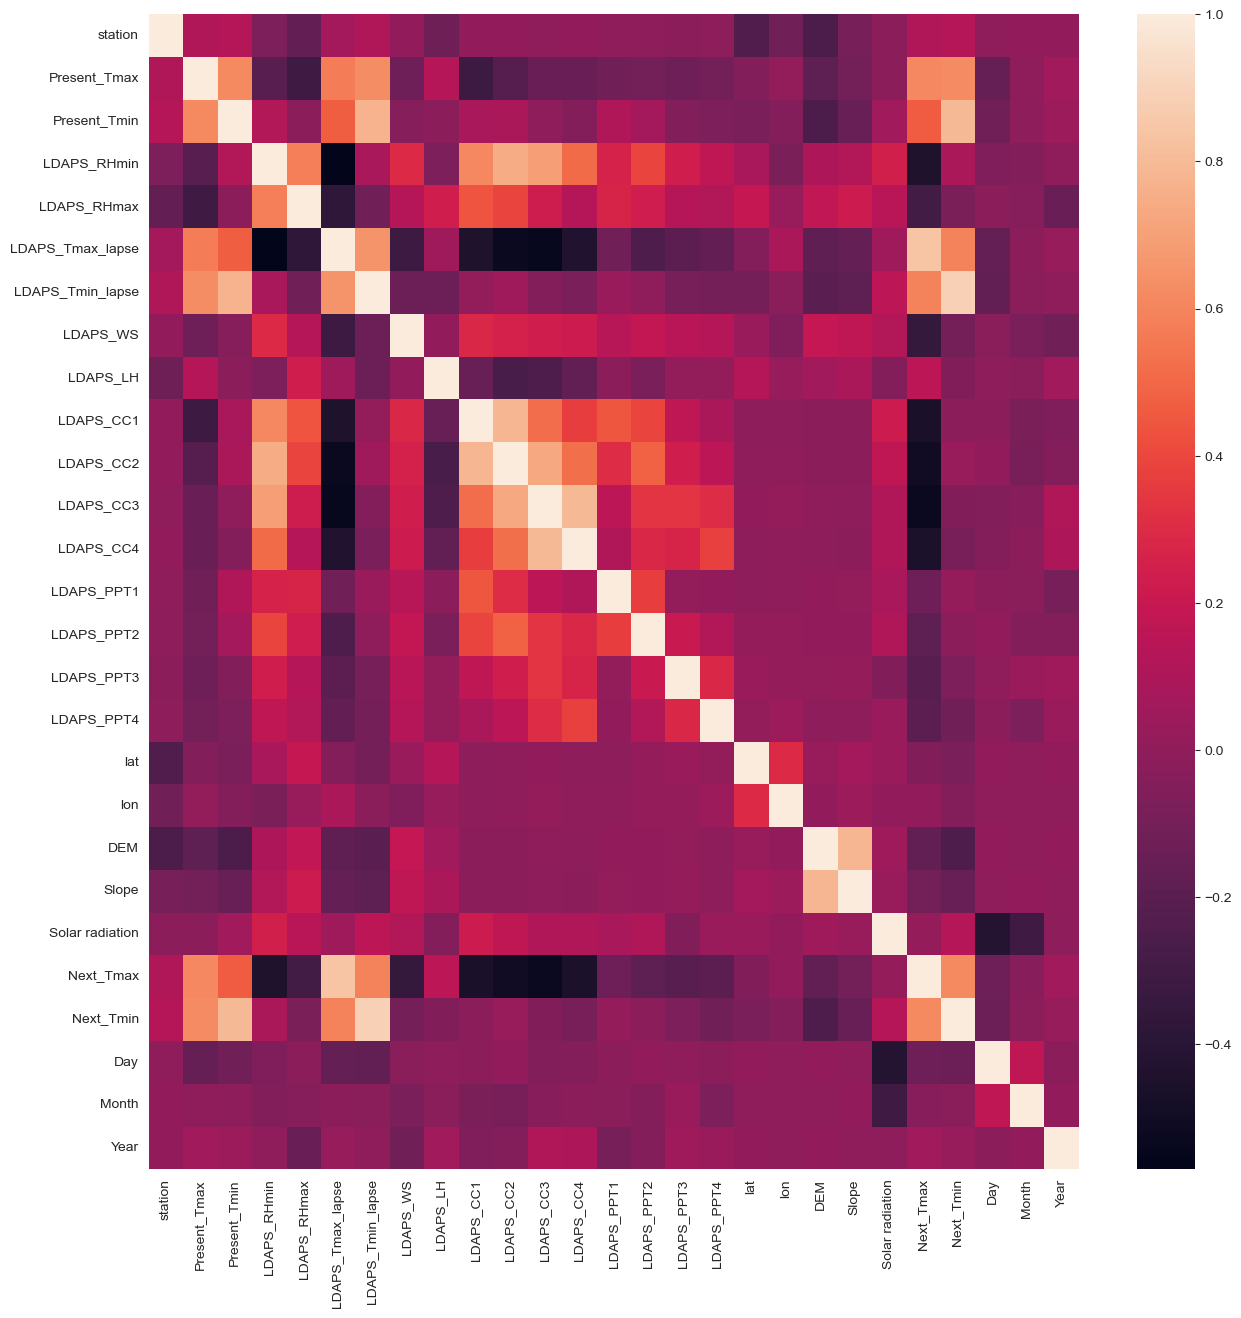

In [51]:
plt.figure(figsize=(15,15))
sns.heatmap(df_temp.corr())

Temperature and cloud cover related feature are moderately or highly correlated with Target Feature

In [52]:
# Droping unnecessry columns
df_temp.drop(['Date'], axis=1, inplace=True)

In [55]:
df_temp.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'Day', 'Month', 'Year'],
      dtype='object')

# Outliers Detection and Removal

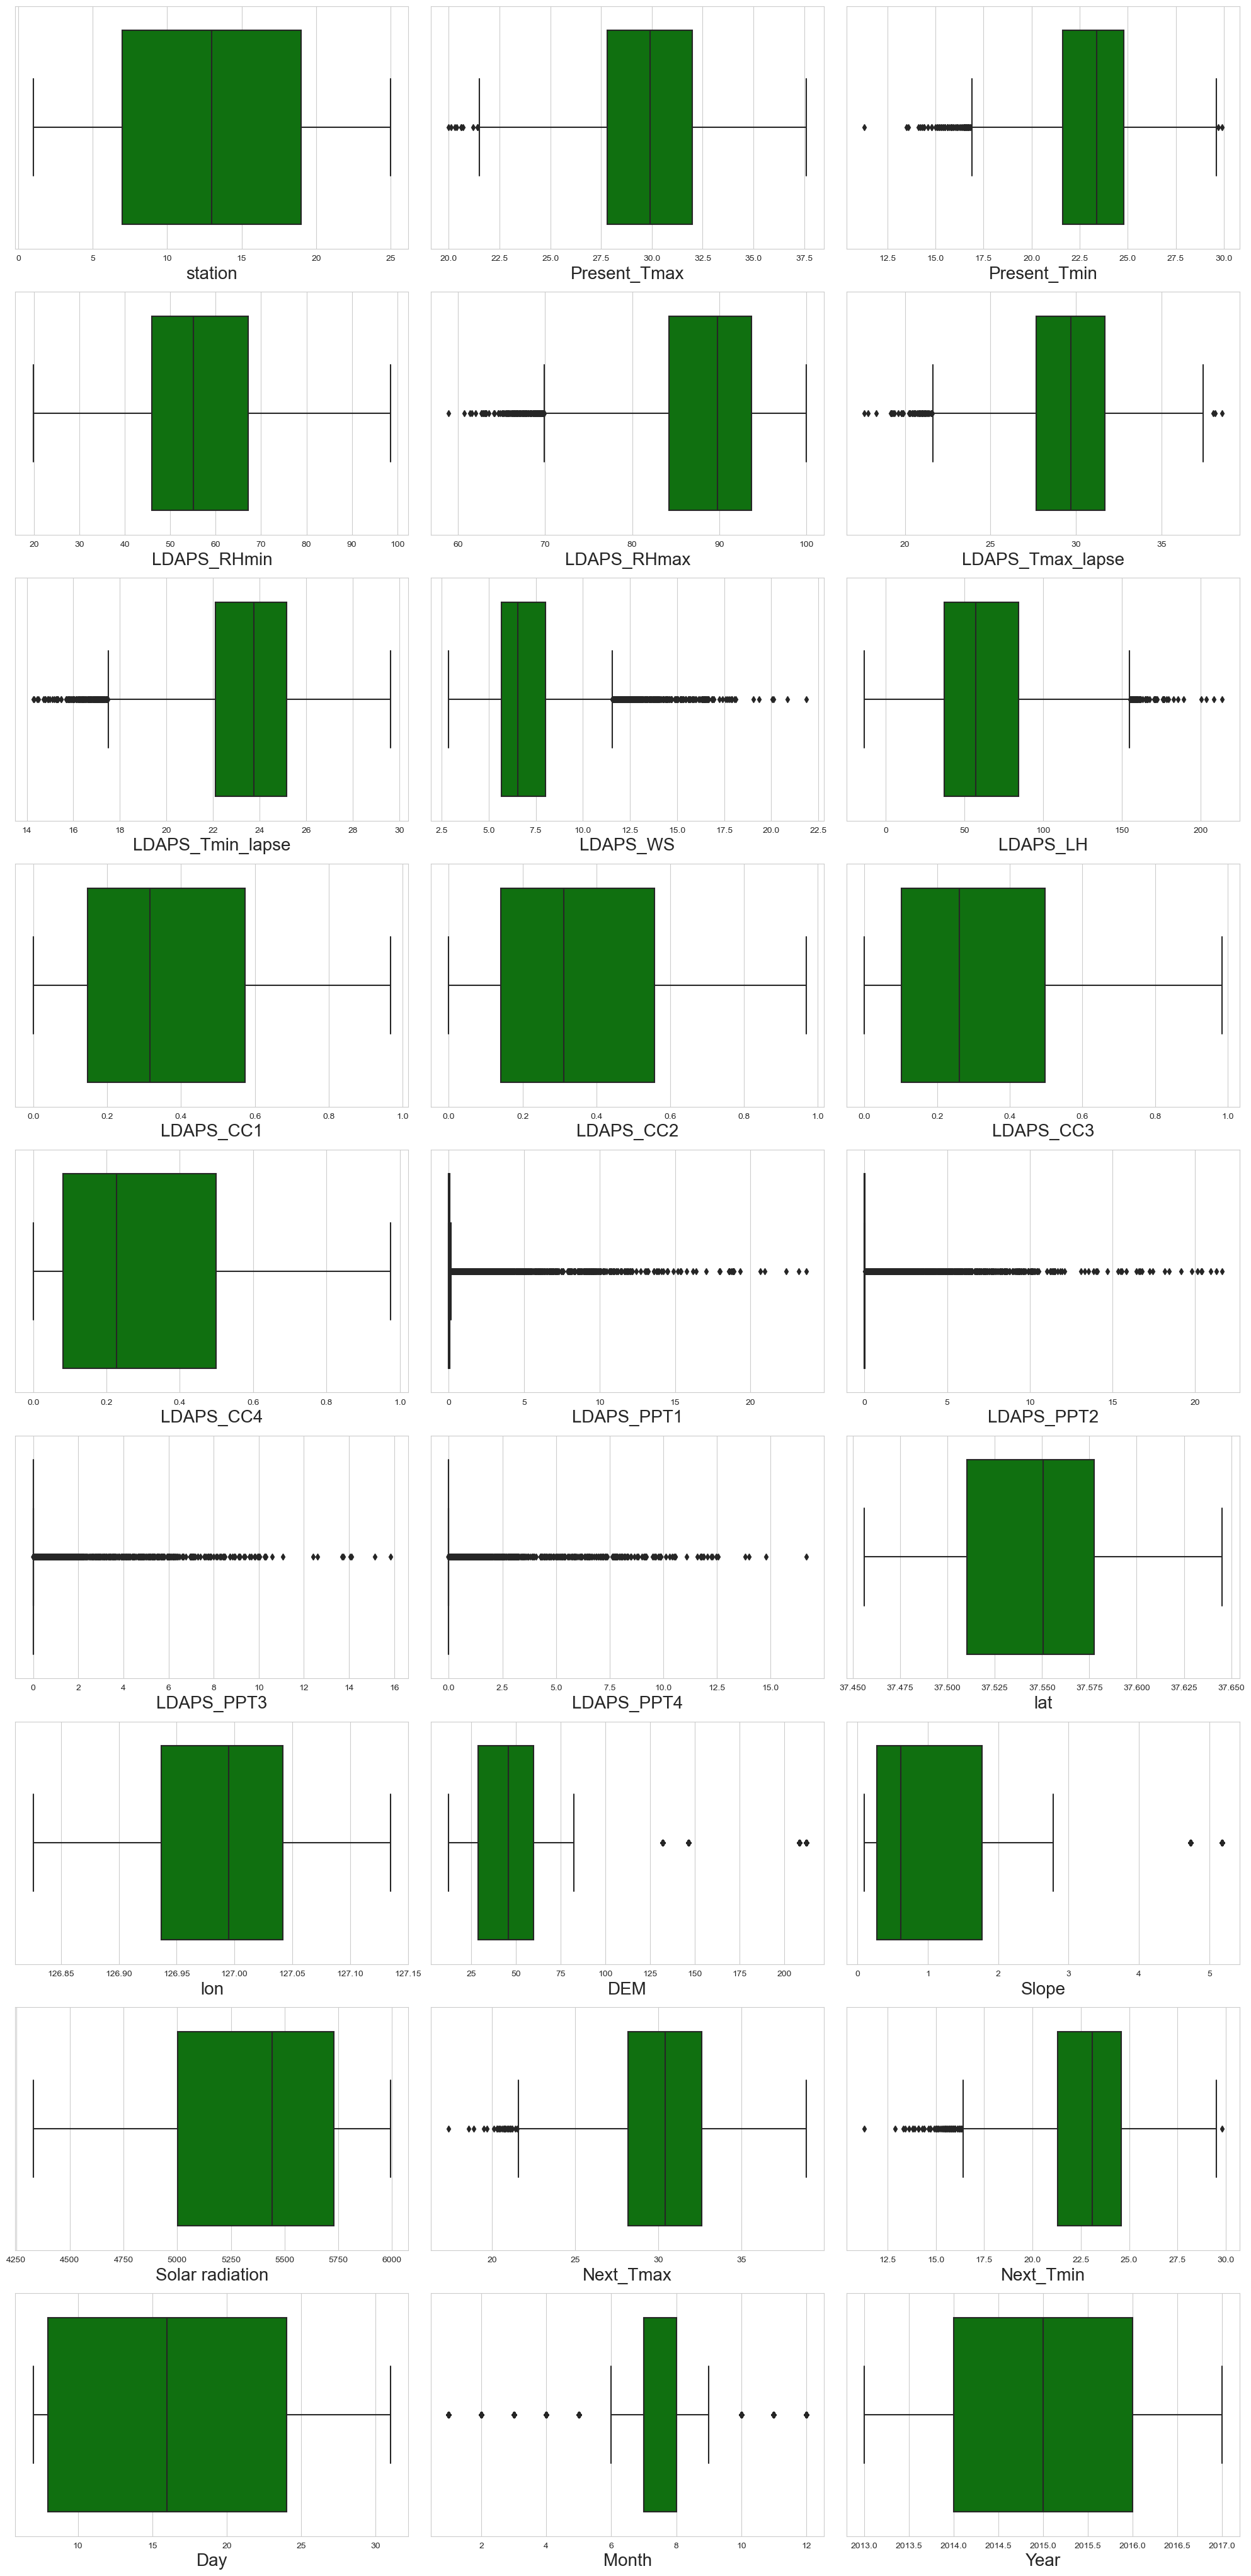

In [59]:
plt.figure(figsize=(20,45),facecolor='white')
plotnumber=1

for column in df_temp:
    if plotnumber<=29:
        ax=plt.subplot(10,3,plotnumber)
        sns.boxplot(df_temp[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

 we can see outliers exist dataset.

# Outliers removal using Zscore method

In [60]:
from scipy.stats import zscore
z = np.abs(zscore(df_temp))
threshold = 3
df1 = df_temp[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df_temp.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df_temp.shape[0]-df1.shape[0])/df_temp.shape[0]*100)

df_temp=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (7588, 27)
Shape of the dataframe after removing outliers:  (6739, 27)
Percentage of data loss post outlier removal:  11.188719030047443


# Skewness of features

In [61]:
df_temp.skew()

station            -0.001594
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.686083
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            1.085685
LDAPS_LH            0.567050
LDAPS_CC1           0.594835
LDAPS_CC2           0.505774
LDAPS_CC3           0.701288
LDAPS_CC4           0.708754
LDAPS_PPT1          3.724580
LDAPS_PPT2          4.854967
LDAPS_PPT3          5.516862
LDAPS_PPT4          5.924324
lat                 0.106983
lon                -0.277547
DEM                 1.764698
Slope               1.590130
Solar radiation    -0.520157
Next_Tmax          -0.267526
Next_Tmin          -0.234328
Day                 0.256528
Month              -0.680725
Year                0.025066
dtype: float64

Here some are positively skewed while others are negatively skewed. We gone use yeo-johnson method for transfromation.

In [ ]:
# Making the skew less than or equal to +0.5 and -0.5 for better prediction using yeo-johnson method
skew=['LDAPS_RHmax','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC3','LDAPS_CC4',
      'LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope','Solar radiation','Month']

# Importing Powertransformer
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

# Transfroming skew data
df[skew] = scaler.fit_transform(df[skew].values)

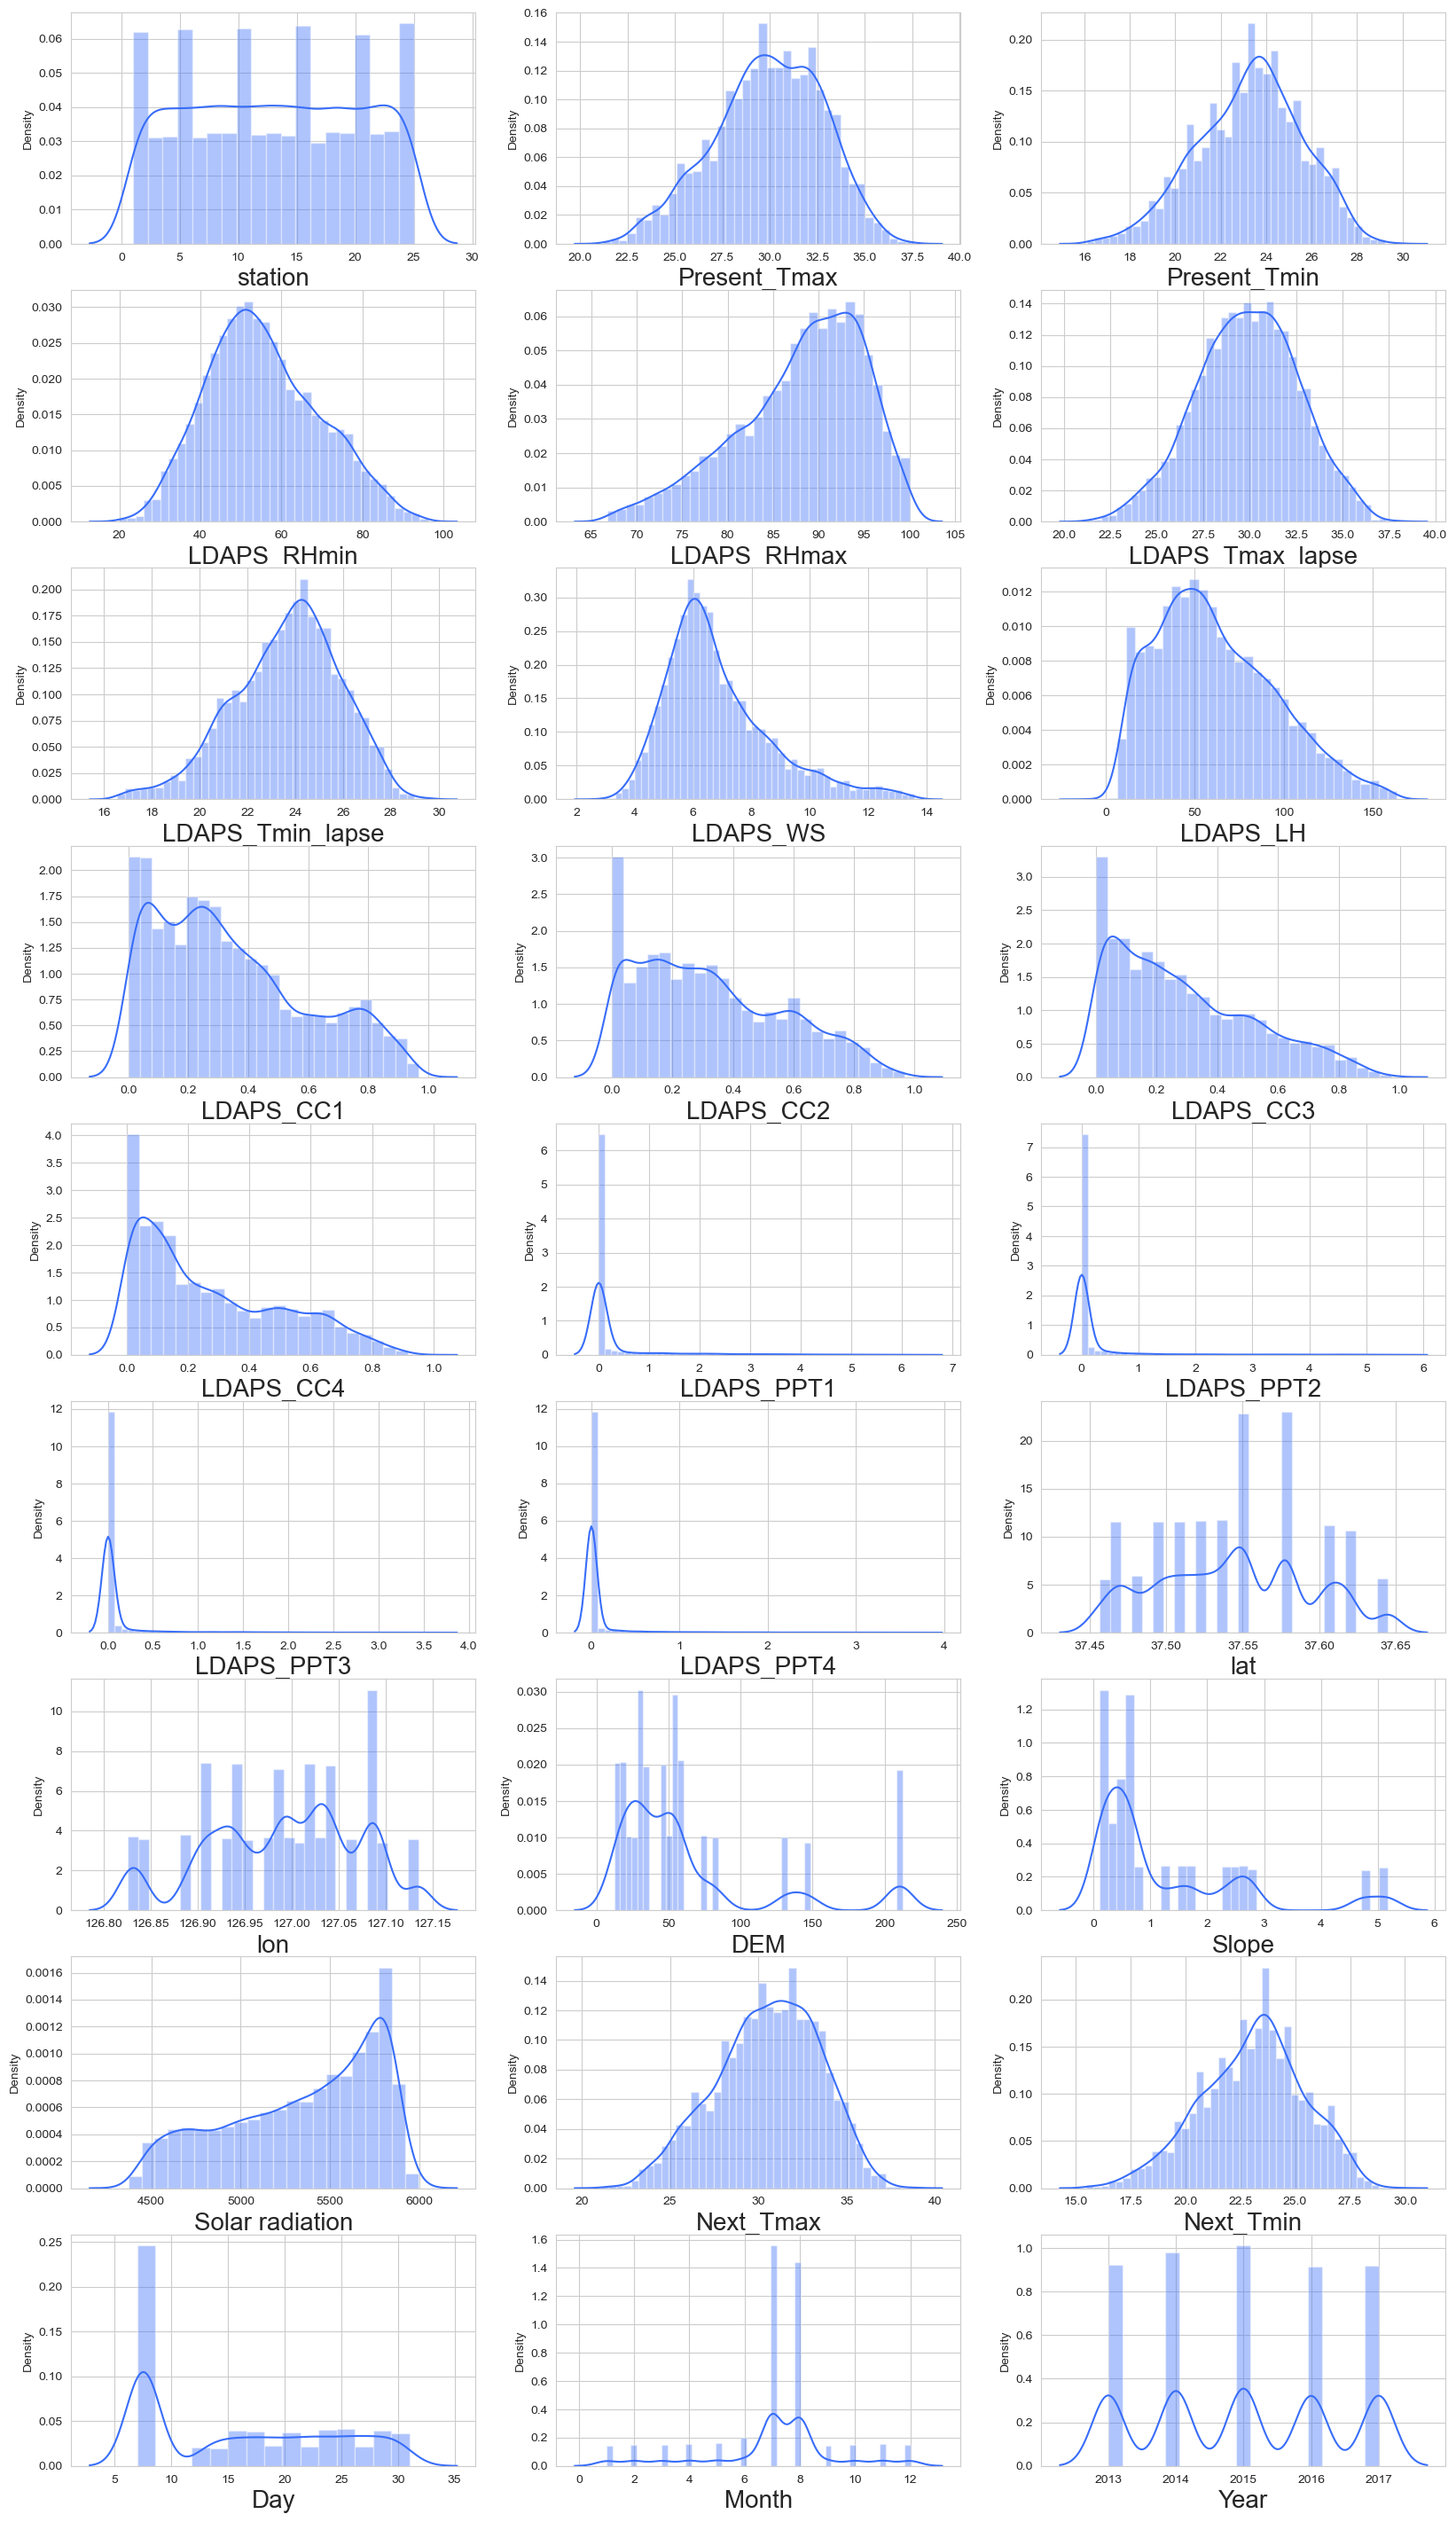

In [62]:
plt.figure(figsize=(20,40),facecolor='white')
sns.set_palette('rainbow')
plotnum=1
for col in df_temp:
    if plotnum<=29:
        plt.subplot(10,3,plotnum)
        sns.distplot(df_temp[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

Skewness is important feature for continous data. There is no relevence of skweness for discrete numerical feature like month. S v ignore sknewness in target feature.

# Machine Learning Model Building For Next_Tmax

In [63]:
# Splitting data in target and dependent feature
X = df_temp.drop(['Next_Tmax'], axis =1)
Y = df_temp['Next_Tmax']

In [65]:
X.skew()

station            -0.001594
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.686083
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            1.085685
LDAPS_LH            0.567050
LDAPS_CC1           0.594835
LDAPS_CC2           0.505774
LDAPS_CC3           0.701288
LDAPS_CC4           0.708754
LDAPS_PPT1          3.724580
LDAPS_PPT2          4.854967
LDAPS_PPT3          5.516862
LDAPS_PPT4          5.924324
lat                 0.106983
lon                -0.277547
DEM                 1.764698
Slope               1.590130
Solar radiation    -0.520157
Next_Tmin          -0.234328
Day                 0.256528
Month              -0.680725
Year                0.025066
dtype: float64

In [66]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

PCA

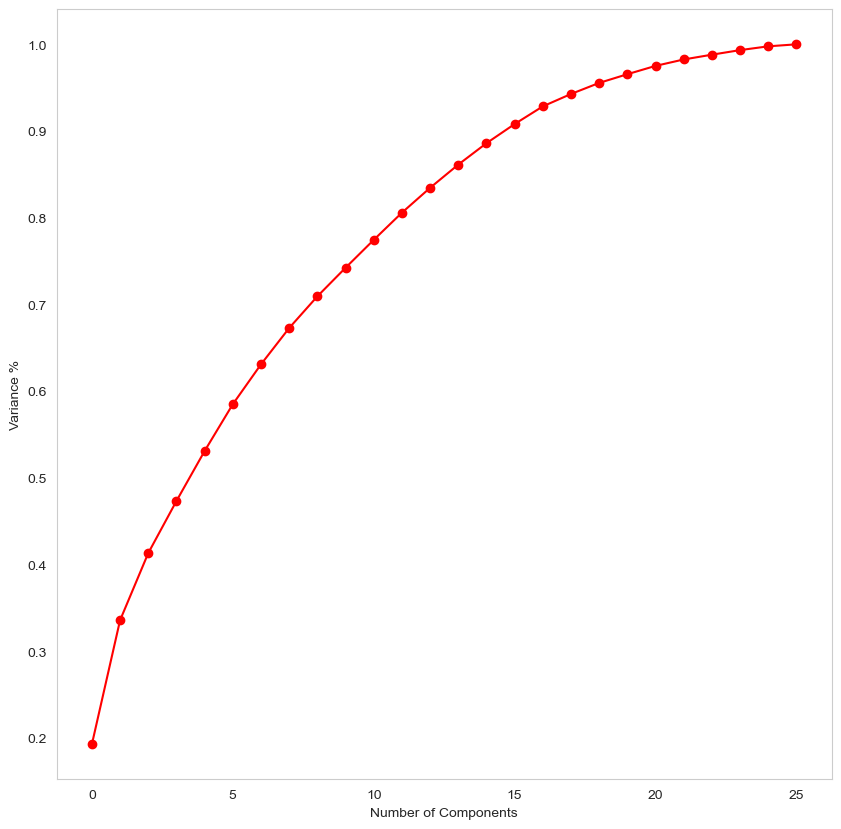

In [68]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.grid()

AS per the graph, we can see that 15 principal components attribute for 90% of variation in the data. We shall pick the first 15 components for our prediction.

In [69]:
pca_new = PCA(n_components=15)
x_new = pca_new.fit_transform(X_scale)

In [70]:
principle_x=pd.DataFrame(x_new,columns=np.arange(15))

In [108]:
pip install xgboost

     ---------------------------------------- 99.7/99.7 MB 5.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [109]:
import xgboost as xgb

In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor



In [74]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=42, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (4515, 15)
Training target vector size: (4515,)
Test feature matrix size: (2224, 15)
Test target vector size: (2224,)


Finding best Random state

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,500):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.7994100950828638 on Random_state 245


# Linear Regression Model

In [77]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=108, test_size=.33)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Wins:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Wins:'+'\033[0m\n',Y_test)

Predicted Wins:
 [31.91973591 30.07801077 29.23328749 ... 26.75292192 25.63094389
 32.79052184]


Actual Wins:
 934     32.0
4582    30.1
7277    27.8
4776    27.6
3755    29.8
        ... 
7096    36.7
7148    35.4
7667    28.4
5063    24.0
4239    32.6
Name: Next_Tmax, Length: 2224, dtype: float64


In [78]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 1.0236008406515202
Mean squared error : 1.7672820298521925
Root Mean Squared Error: 1.329391601392228


 R2 Score :
0.7993882580475928


In [79]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X_scale, Y, cv =3)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : LinearRegression() :

Mean CV Score : 0.67901892465907


# Other Machine Learning Models

In [111]:
rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
adb=AdaBoostRegressor()
gradb=GradientBoostingRegressor()
xgb=XGBRegressor()

model = [rf,dtc,adb,gradb,xgb]

In [112]:
for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 



 Error of  RandomForestRegressor() :
Mean absolute error : 0.7086632194244606
Mean squared error : 0.8867757882194249
Root Mean Squared Error: 0.9416877339221452


 R2 Score :
0.8993382874997058


 Error of  DecisionTreeRegressor() :
Mean absolute error : 1.0617805755395684
Mean squared error : 2.104460431654676
Root Mean Squared Error: 1.4506758534058104


 R2 Score :
0.7611136955319641


 Error of  AdaBoostRegressor() :
Mean absolute error : 1.1538132946082278
Mean squared error : 2.0079822466030453
Root Mean Squared Error: 1.417032902441946


 R2 Score :
0.7720653469586654


 Error of  GradientBoostingRegressor() :
Mean absolute error : 0.8352148500454842
Mean squared error : 1.157284178582384
Root Mean Squared Error: 1.0757714341728841


 R2 Score :
0.8686317231331833


 Error of  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
     

In [113]:
# Cross Validation
model = [rf,dtc,adb,gradb,xgb]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())



Cross Validation Score : RandomForestRegressor() :

Mean CV Score : 0.6851419370100911


Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : 0.4272573948865851


Cross Validation Score : AdaBoostRegressor() :

Mean CV Score : 0.6543441287418974


Cross Validation Score : GradientBoostingRegressor() :

Mean CV Score : 0.7057852790440279


Cross Validation Score : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=Non

# Hyper Parameter Tuning : GridSearchCV

In [124]:
from sklearn.model_selection import GridSearchCV

In [125]:
parameter = {'n_estimators':[200,400,500,600],'gamma':np.arange(0,0.2,0.1),
              'booster' : ['gbtree','dart','gblinear'], 'max_depth':[4,6,8,10],
              'eta' : [0.001, 0.01, 0.1] }

In [126]:
GCV = GridSearchCV(XGBRegressor(),parameter,verbose =10)

In [122]:
GCV.fit(X_train,Y_train)


Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV 1/5; 1/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200
[CV 1/5; 1/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200;, score=0.211 total time=   0.7s
[CV 2/5; 1/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200
[CV 2/5; 1/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200;, score=0.227 total time=   1.0s
[CV 3/5; 1/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200
[CV 3/5; 1/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200;, score=0.215 total time=   0.7s
[CV 4/5; 1/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200
[CV 4/5; 1/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200;, score=0.235 total time=   0.7s
[CV 5/5; 1/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200
[C

KeyboardInterrupt: 

we can see that XGB gives maximum Accuracy. So we will apply Hyperparameter tuning on XGB Booster model

In [128]:
GCV.best_params_

# Final Model

In [129]:
Final_mod =  XGBRegressor(n_estimators=100 , booster= 'dart', eta= 0.1, max_depth= 10, gamma= 0.0 )
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 




 Error in Final Model :
Mean absolute error : 0.6566155428509061
Mean squared error : 0.7786102716701525
Root Mean Squared Error: 0.8823889571329372


 R2 Score of Final Model :
0.9116166179119413


 True Values Vs Predicted Value plot :


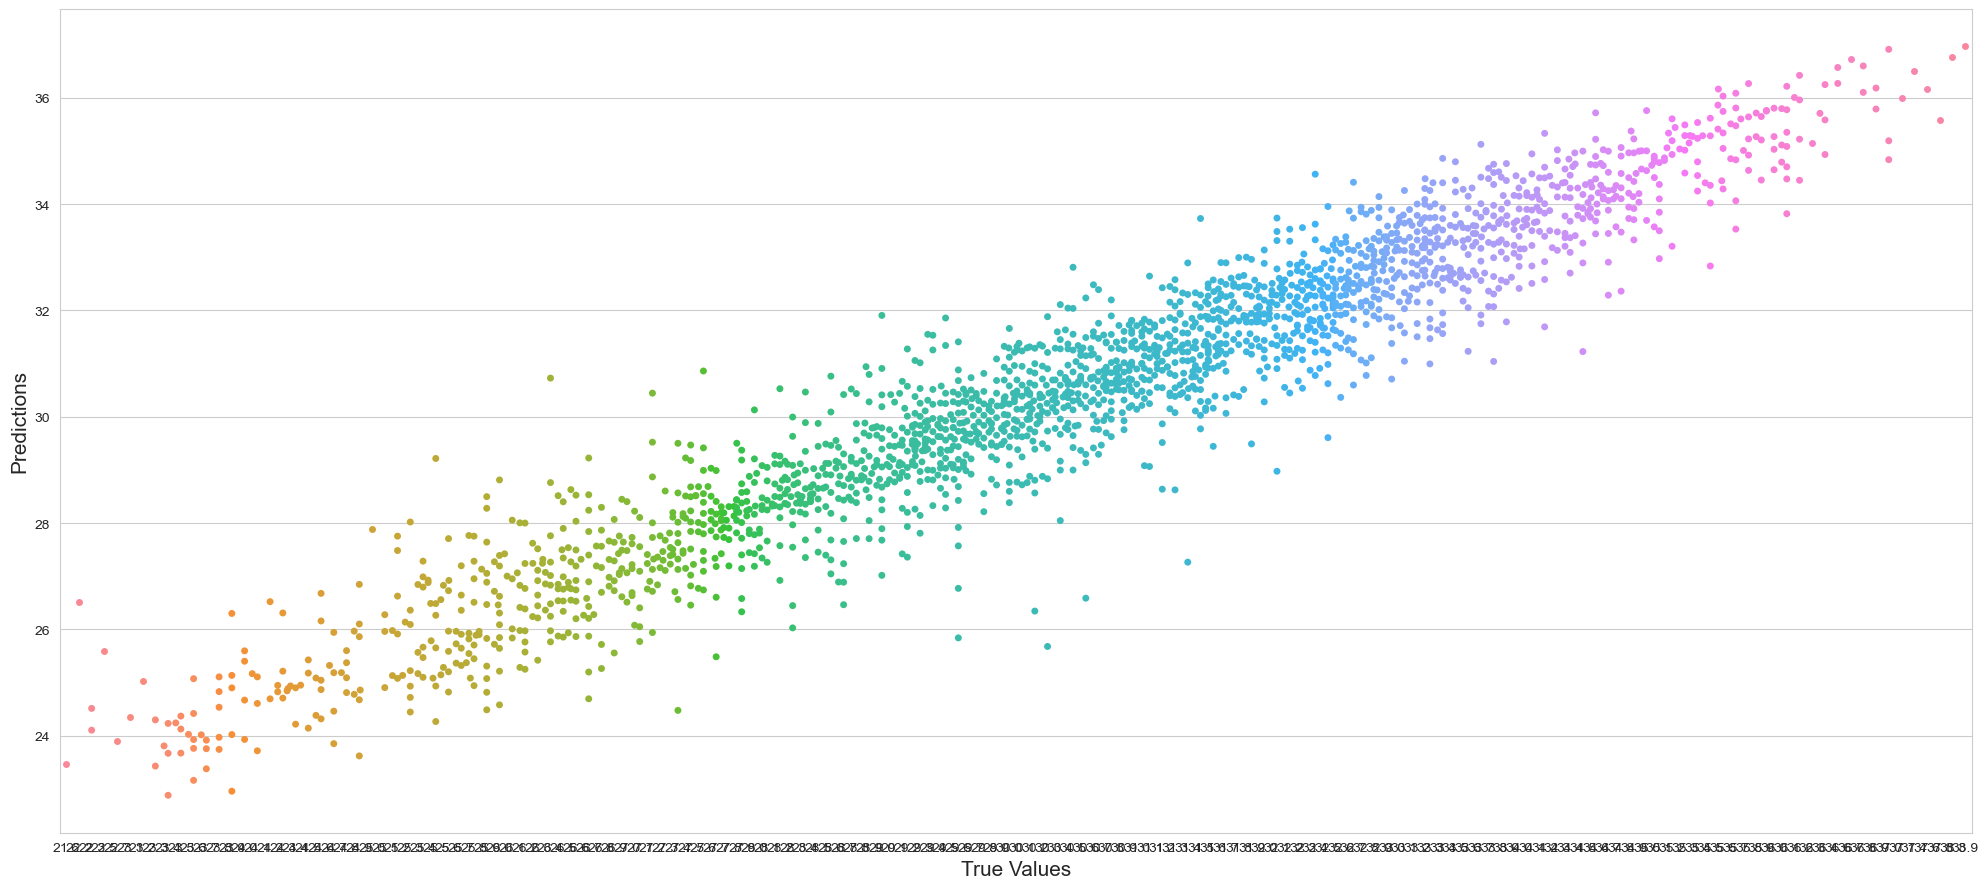

In [130]:
plt.figure(figsize=(20,9))
y_pred=Final_mod.predict(X_test)
sns.swarmplot(Y_test.round(2), y_pred)
print('\033[1m'+' True Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('True Values' , fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()

# Saving Model

In [131]:
import joblib
joblib.dump(Final_mod,'Next_TmaxForecast.pkl')

['Next_TmaxForecast.pkl']

# Prediction According Final Regression Model

In [133]:
 # Loading the saved model
Model = joblib.load("Next_TmaxForecast.pkl")

# prediction  DataFrame
actual = np.array(Y_test)
predicted = np.array(Model.predict(X_test))
df_Predicted = pd.DataFrame({"Actual Values":actual,"Predicted Values":predicted},index= range(len(actual)))
df_Predicted 

,Actual Values,Predicted Values
0,32.0,31.436302
1,30.1,29.841095
2,27.8,28.132952
3,27.6,27.091928
4,29.8,30.127964
...,...,...
2219,36.7,36.722366
2220,35.4,34.246475
2221,28.4,27.349836
2222,24.0,23.928528


# Machine Learning Model for Next_Tmin

In [135]:
# Splitting data in target and dependent feature

X = df_temp.drop(['Next_Tmin'], axis =1)
Y = df_temp['Next_Tmin']

In [136]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [137]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=42, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (4515, 26)
Training target vector size: (4515,)
Test feature matrix size: (2224, 26)
Test target vector size: (2224,)


# Linear Regression Model

In [138]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=43, test_size=.33)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Wins:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Wins:'+'\033[0m\n',Y_test)

Predicted Wins:
 [23.47609799 24.50656791 23.57495942 ... 22.50456033 26.22079247
 25.49344609]


Actual Wins:
 5006    23.0
947     25.6
3726    23.0
715     22.1
4242    24.0
        ... 
4097    24.6
3186    17.1
6641    23.1
3854    26.2
1190    25.7
Name: Next_Tmin, Length: 2224, dtype: float64


In [139]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 0.7351670315157037
Mean squared error : 0.8590198198524291
Root Mean Squared Error: 0.9268332211635647


 R2 Score :
0.8509969653557964


In [140]:
# Cross Validation
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X_scale, Y, cv =3)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : LinearRegression() :

Mean CV Score : 0.7879306613344239


# Applying other ML Models

In [141]:
rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
adb=AdaBoostRegressor()
gradb=GradientBoostingRegressor()
xgb=XGBRegressor()

model = [rf,dtc,adb,gradb,xgb]

In [142]:
for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 



 Error of  RandomForestRegressor() :
Mean absolute error : 0.5509545863309352
Mean squared error : 0.5211354231115105
Root Mean Squared Error: 0.7218971000852619


 R2 Score :
0.9096053924372249


 Error of  DecisionTreeRegressor() :
Mean absolute error : 0.8199190647482014
Mean squared error : 1.2336285971223022
Root Mean Squared Error: 1.1106883438311137


 R2 Score :
0.786018435958006


 Error of  AdaBoostRegressor() :
Mean absolute error : 0.8290571011808506
Mean squared error : 1.045010084112213
Root Mean Squared Error: 1.0222573473016532


 R2 Score :
0.8187356447802758


 Error of  GradientBoostingRegressor() :
Mean absolute error : 0.5998597811667815
Mean squared error : 0.5845373139342006
Root Mean Squared Error: 0.7645503998653068


 R2 Score :
0.8986078881696468


 Error of  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
    

# Cross validation

In [145]:
# Cross Validation
model = [rf,dtc,adb,gradb,xgb]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())



Cross Validation Score : RandomForestRegressor() :

Mean CV Score : 0.7931797637299772


Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : 0.6010166246156163


Cross Validation Score : AdaBoostRegressor() :

Mean CV Score : 0.7437960420677499


Cross Validation Score : GradientBoostingRegressor() :

Mean CV Score : 0.801529337315164


Cross Validation Score : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None

# Final Regression Model For Next_Tmin

In [146]:
Final_mod =  XGBRegressor(n_estimators=100 , booster= 'dart', eta= 0.1, max_depth= 8, gamma= 0.0 )
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 




 Error in Final Model :
Mean absolute error : 0.47200537980031637
Mean squared error : 0.38897948782834213
Root Mean Squared Error: 0.6236822009872833


 R2 Score of Final Model :
0.9325287696962244




 True Values Vs Predicted Value plot :


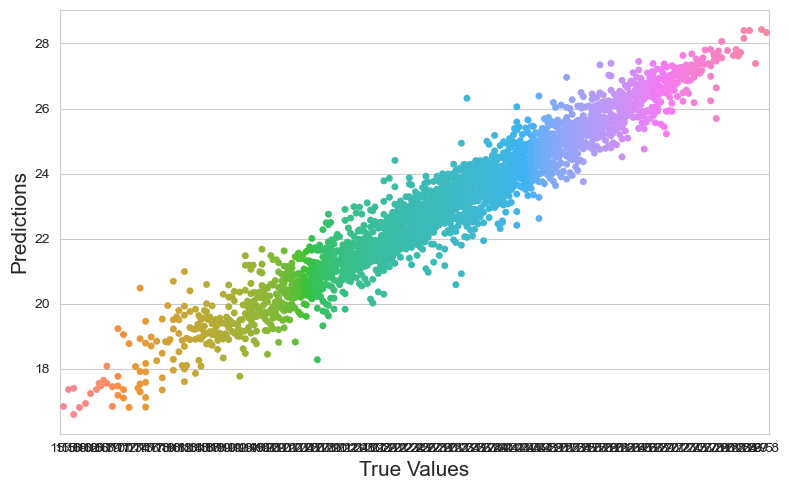

In [148]:
plt.figure(figsize=(8,5))
y_pred=Final_mod.predict(X_test)
sns.swarmplot(Y_test.round(2), y_pred)
print('\033[1m'+' True Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('True Values' , fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()

# Saving Model

In [149]:
import joblib
joblib.dump(Final_mod,'Next_TminForecast.pkl')

['Next_TminForecast.pkl']